In [1]:
import json

with open("../raw/label_descriptions.json") as f:
    meta = json.load(f)
    
meta.keys()

dict_keys(['info', 'categories', 'attributes'])

In [91]:
df_ctg = pd.DataFrame(meta["categories"])
df_ctg["id"] += 1
df_ctg = df_ctg[~df_ctg["supercategory"].isin(["garment parts", "closures", "decorations"])]
df_ctg = df_ctg.set_index("id")
df_ctg.loc[0] = {"name": "background", "supercategory": "background", "level": 2}
df_ctg = df_ctg.sort_index()
df_ctg

,name,supercategory,level
id,,,
0,background,background,2
1,"shirt, blouse",upperbody,2
2,"top, t-shirt, sweatshirt",upperbody,2
3,sweater,upperbody,2
4,cardigan,upperbody,2
5,jacket,upperbody,2
6,vest,upperbody,2
7,pants,lowerbody,2
8,shorts,lowerbody,2


In [4]:
df_attr = pd.DataFrame(meta["attributes"]).set_index("id")
df_attr

,name,supercategory,level
id,,,
0,above-the-hip (length),length,1
1,hip (length),length,1
2,micro (length),length,1
3,mini (length),length,1
4,above-the-knee (length),length,1
...,...,...,...
87,high waist,waistline,1
88,normal waist,waistline,1
89,low waist,waistline,1


In [92]:
df = pd.read_csv("../raw/train.csv")
df["category_id"] = df["ClassId"].apply(lambda c: c.split("_")[0]).astype("int32") + 1
df = df[df["category_id"].isin(df_ctg.index)]
df

,ImageId,EncodedPixels,Height,Width,ClassId,category_id
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,7
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,1
8,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,4566382 8 4571592 25 4576803 41 4582013 58 458...,5214,3676,4,5
10,0000fe7c9191fba733c8a69cfaf962b7.jpg,1343707 9 1346138 27 1348569 44 1351000 62 135...,2448,2448,1,2
12,0002ec21ddb8477e98b2cbb87ea2e269.jpg,2287509 4 2290504 12 2290588 26 2293501 18 229...,3000,1997,10,11
...,...,...,...,...,...,...
331202,fffe20b555b98c3c1f26c8dfff275cbc.jpg,3800472 4 3803465 12 3806458 20 3809451 29 381...,3000,2001,23,24
331203,fffe20b555b98c3c1f26c8dfff275cbc.jpg,2915555 2 2918553 4 2921550 7 2924547 9 292754...,3000,2001,23,24
331205,fffe20b555b98c3c1f26c8dfff275cbc.jpg,2611656 2 2614657 4 2617657 8 2620658 11 26236...,3000,2001,6,7
331207,fffe20b555b98c3c1f26c8dfff275cbc.jpg,2446541 2 2449539 5 2452536 10 2455534 14 2458...,3000,2001,0,1


In [9]:
# c.f., https://www.kaggle.com/c/imaterialist-fashion-2019-FGVC6/overview/evaluation
# ClassId: {category_id}_{attribute_id1}_{attribute_id2}_...

df_multi = df[df["ClassId"].apply(len) >= 3]
df_multi["ClassId"]

42           10_3_20_34_56_69_91
44         3_1_10_20_41_60_61_91
48        10_5_19_33_59_61_66_88
92            4_0_20_41_60_72_88
97               6_8_20_39_60_70
                   ...          
331136           8_3_20_33_60_61
331137     3_6_11_19_40_60_61_88
331163           1_0_20_41_49_61
331165     6_8_15_20_40_60_61_87
331166     9_3_10_20_41_60_61_91
Name: ClassId, Length: 11496, dtype: object

In [10]:
row = df_multi.iloc[0]
row

ImageId                       000aac3870ea7c59ca0333ffa5327323.jpg
EncodedPixels    8971124 17 8975101 49 8979077 82 8983053 116 8...
Height                                                        4000
Width                                                         6000
ClassId                                        10_3_20_34_56_69_91
category_id                                                     11
Name: 42, dtype: object

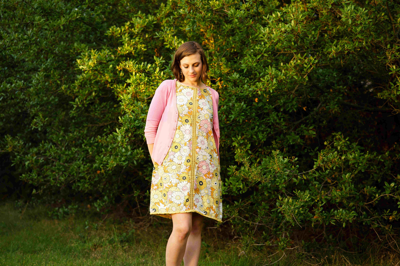

In [11]:
from PIL import Image

pil_img = Image.open(Path("../raw/train") / row["ImageId"]).convert("RGB")
pil_img.resize(
    (int(pil_img.size[0] / 15),
    int(pil_img.size[1] / 15))
)

In [15]:
from imaterialist.transforms import rle_to_mask

g = df[df["ImageId"] == row["ImageId"]]

masks = np.stack(
    g.apply(
        lambda r: rle_to_mask(r["EncodedPixels"], r["Height"], r["Width"]),
        axis=1,
    ),
    axis=-1
)
np.unique(masks)
masks.shape

category_ids = g["category_id"].values

from segmentation.transforms import masks_to_segmap

segmap = masks_to_segmap(masks, category_ids)
np.unique(segmap)
segmap.shape

array([0, 1], dtype=uint8)

(4000, 6000, 2)

array([ 0,  4, 11], dtype=uint8)

(4000, 6000)

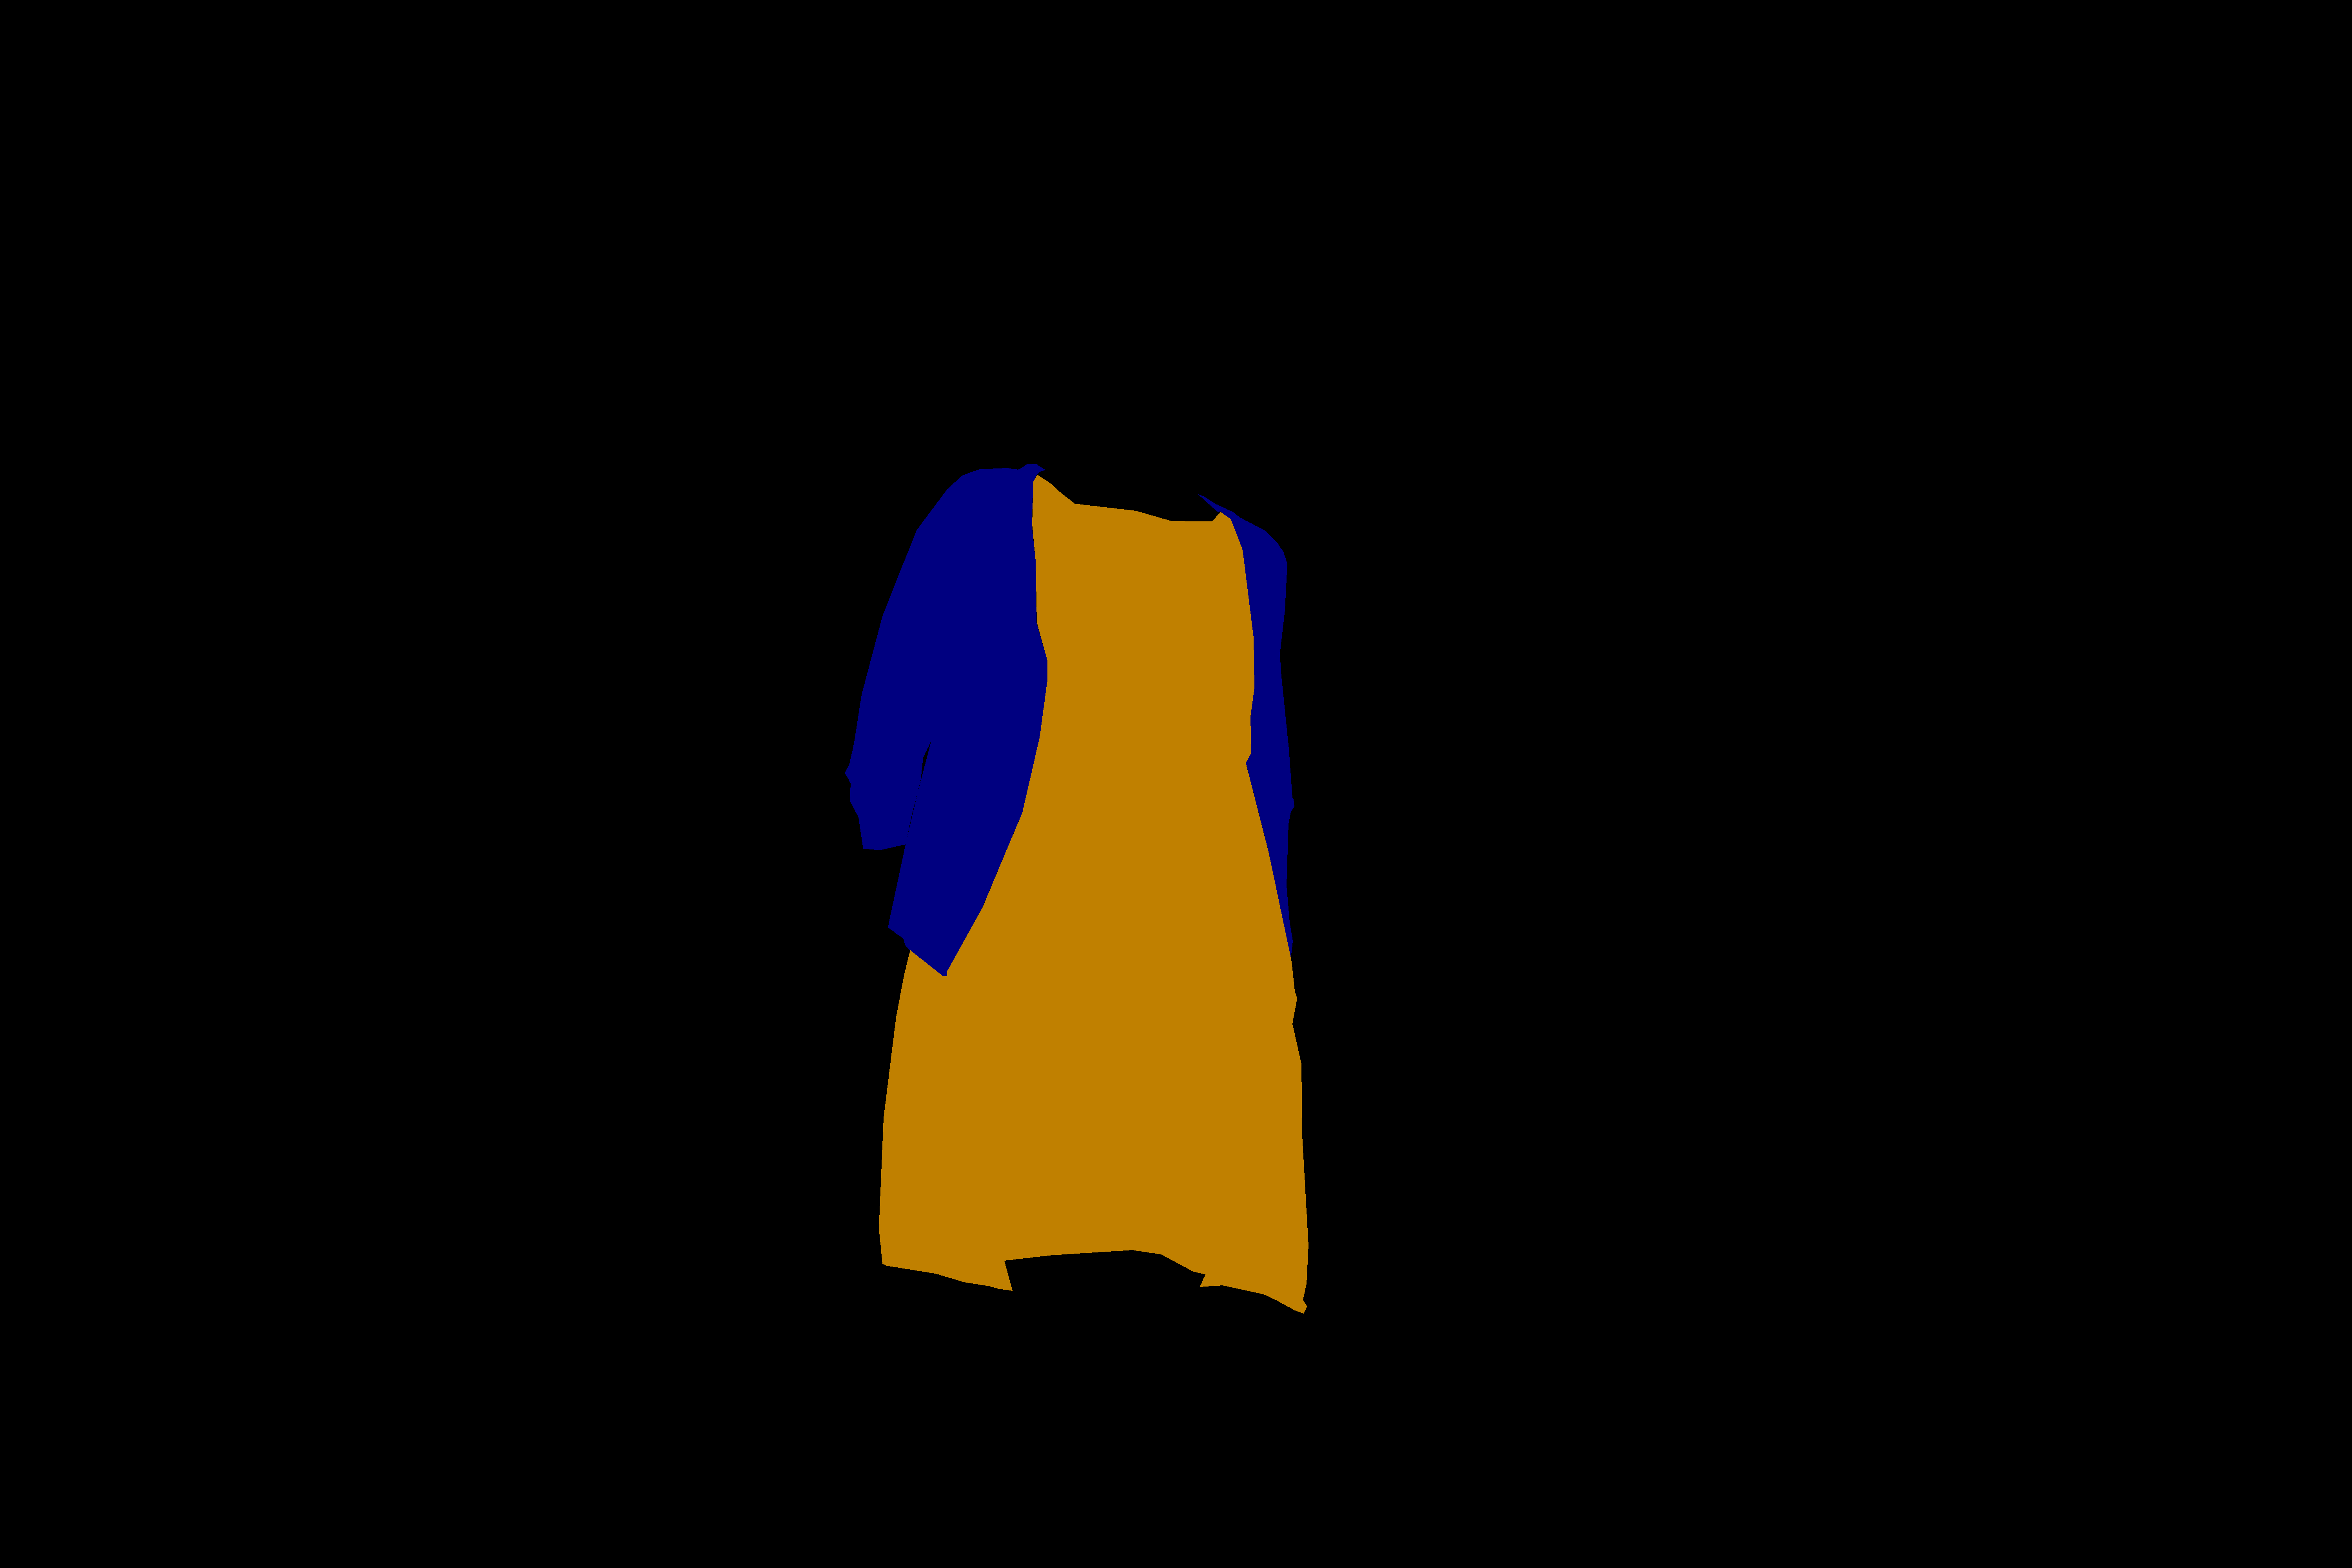

In [23]:
from segmentation.transforms import segmap_to_pil

pil_segmap = segmap_to_pil(segmap, df_ctg.index)
pil_segmap
pil_segmap.save("/tmp/segmap.png")

In [24]:
segmap = np.array(Image.open("/tmp/segmap.png"))
np.unique(segmap)
segmap.shape

array([ 0,  4, 11], dtype=uint8)

(4000, 6000)

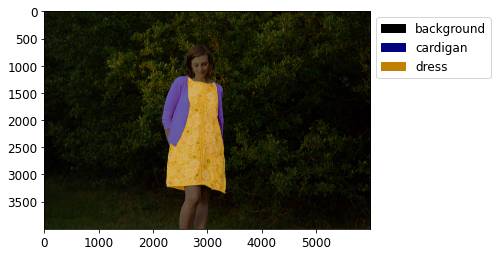

In [25]:
from segmentation.visualizations import vis_segmap


ax, legend_handles = vis_segmap(
    np.array(pil_img),
    segmap,
    label_names=df_ctg["name"].tolist(),
#     all_label_names_in_legend=True,
    alpha=0.6,
)
_ = ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)

In [29]:
df_attr.iloc[[int(x) for x in row["ClassId"].split("_")[1:]]]

,name,supercategory,level
id,,,
3,mini (length),length,1
20,symmetrical,silhouette,1
34,a-line,silhouette,1
56,cutout,"textile finishing, manufacturing techniques",1
69,floral,textile pattern,1
91,no waistline,waistline,1


In [30]:
df[["Height", "Width"]].value_counts()

Height  Width
3000    2000     8812
1500    1000     4956
1024    683      4640
1000    667      4594
1200    800      3819
                 ... 
4220    2804        1
920     631         1
2722    2722        1
919     613         1
2581    3442        1
Length: 10730, dtype: int64

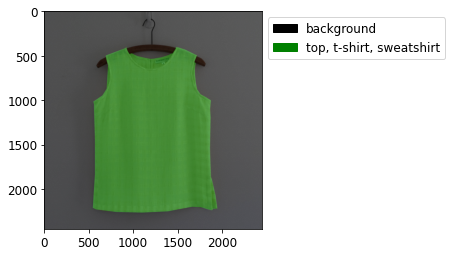

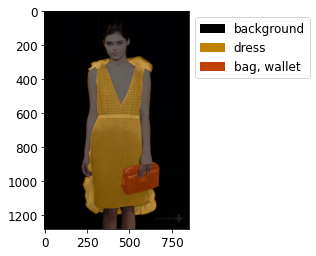

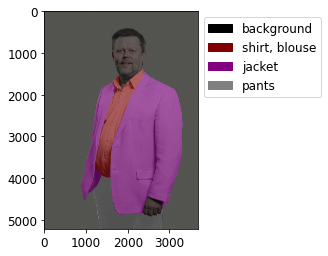

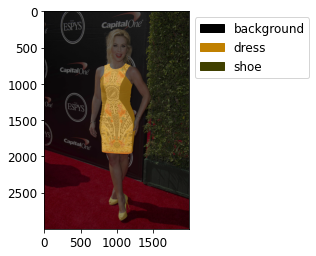

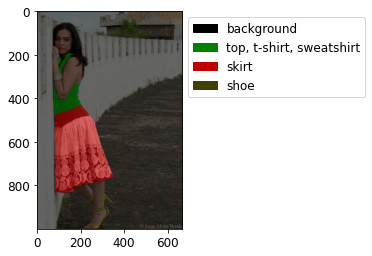

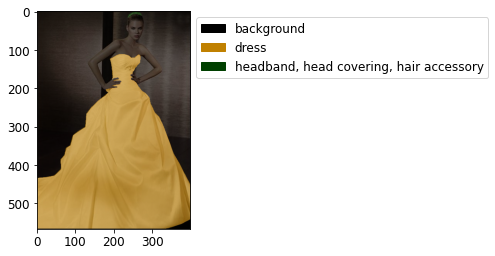

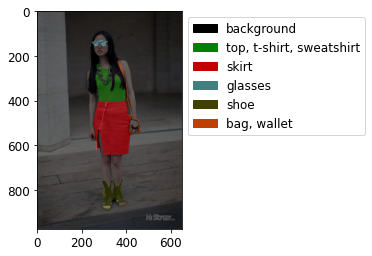

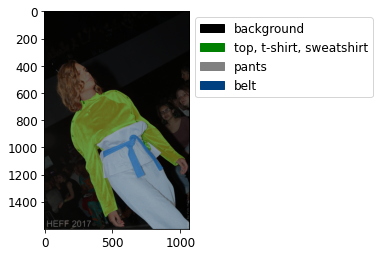

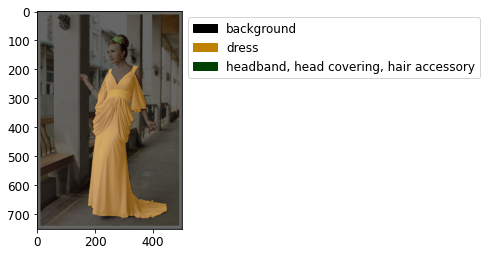

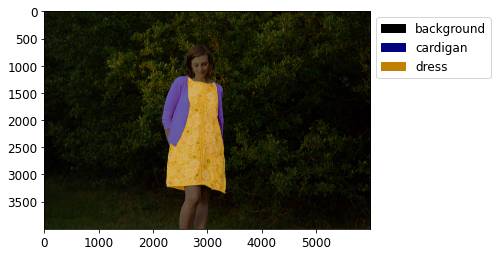

In [26]:
# check cli/rle2png.py results
img_files = Path("../tiny/train").glob("*.jpg")
ann_files = Path("../tiny/ann").glob("*.png")
it = zip(img_files, ann_files)

for img_file, ann_file in it:
    img = Image.open(img_file).convert("RGB")
    segmap = np.array(Image.open(ann_file))

    ax, legend_handles = vis_segmap(
        np.array(img),
        segmap,
        label_names=df_ctg["name"].tolist(),
    #     all_label_names_in_legend=True,
        alpha=0.6,
    )
    _ = ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc=2)

In [ ]:
# Compute class weights for class imbalarance.

In [27]:
df_ctg.name.str.replace(", ", "|").str.replace(" ", "_").to_csv("../raw/classes.txt", header=None, index=None)

In [29]:
from segmentation.transforms import voc_colormap

pallete = voc_colormap(df_ctg.index)
np.savetxt("../raw/palette.txt", pallete, fmt="%d")

In [110]:
sr_freq = (
    df
    .drop_duplicates(subset=["ImageId", "category_id"], keep="first")
    ["category_id"]
    .value_counts()
    .rename("freq")
    .sort_index()
)

sr_freq.loc[0] = len(df["ImageId"].unique())


df_ctg["freq"] = sr_freq
df_ctg["weight_median"] = sr_freq.median() / sr_freq
df_ctg["weight_median_squared"] = df_ctg["weight_median"] ** 2
df_ctg["weight_mean"] = sr_freq.mean() / sr_freq
df_ctg["weight_max"] = sr_freq.max() / sr_freq
df_ctg["weight_min"] = sr_freq.min() / sr_freq

df_ctg["weight_dress_bg_05"] = 1
df_ctg["weight_dress_bg_05"].iloc[0] = 0.5
df_ctg["weight_dress_bg_05"].iloc[11] = 0.5

df_ctg

for col in df_ctg.columns:
    if "weight" in col:
        name = col.replace("weight_", "")
        weight_file = f"../raw/class_weights/{name}.txt"
        df_ctg[col].to_csv(weight_file, index=None, header=False)

/Users/hiroshi.matsui/Library/Caches/pypoetry/virtualenvs/imaterialist-_q-rxcee-py3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,name,supercategory,level,freq,weight_median,weight_median_squared,weight_mean,weight_max,weight_min,weight_dress_bg_05
id,,,,,,,,,,
0,background,background,2,45194,0.063028,0.003973,0.141756,1.000000,0.001350,0.5
1,"shirt, blouse",upperbody,2,6088,0.467888,0.218919,1.052316,7.423456,0.010020,1.0
2,"top, t-shirt, sweatshirt",upperbody,2,15860,0.179603,0.032257,0.403941,2.849559,0.003846,1.0
3,sweater,upperbody,2,1474,1.932497,3.734543,4.346336,30.660787,0.041384,1.0
4,cardigan,upperbody,2,1099,2.591902,6.717955,5.829390,41.122839,0.055505,1.0
5,jacket,upperbody,2,7718,0.369072,0.136214,0.830073,5.855662,0.007904,1.0
6,vest,upperbody,2,718,3.967270,15.739233,8.922702,62.944290,0.084958,1.0
7,pants,lowerbody,2,12308,0.231435,0.053562,0.520515,3.671921,0.004956,1.0
8,shorts,lowerbody,2,2720,1.047243,1.096717,2.355331,16.615441,0.022426,1.0


In [111]:
df_ctg.sort_values("freq", ascending=False)

,name,supercategory,level,freq,weight_median,weight_median_squared,weight_mean,weight_max,weight_min,weight_dress_bg_05
id,,,,,,,,,,
0,background,background,2,45194,0.063028,0.003973,0.141756,1.000000,0.001350,0.5
24,shoe,legs and feet,2,23870,0.119334,0.014241,0.268391,1.893339,0.002556,1.0
11,dress,wholebody,2,18592,0.153211,0.023474,0.344584,2.430830,0.003281,0.5
2,"top, t-shirt, sweatshirt",upperbody,2,15860,0.179603,0.032257,0.403941,2.849559,0.003846,1.0
7,pants,lowerbody,2,12308,0.231435,0.053562,0.520515,3.671921,0.004956,1.0
5,jacket,upperbody,2,7718,0.369072,0.136214,0.830073,5.855662,0.007904,1.0
25,"bag, wallet",others,2,6886,0.413665,0.171119,0.930366,6.563172,0.008859,1.0
20,belt,waist,2,6634,0.429379,0.184366,0.965707,6.812481,0.009195,1.0
1,"shirt, blouse",upperbody,2,6088,0.467888,0.218919,1.052316,7.423456,0.010020,1.0
